In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
complaints_data = pd.read_csv("complaints_dec_2014.csv")

In [4]:
complaints_data.head()

Complaint ID          Product Sub-product  \
0       1177167  Debt collection         NaN   
1       1177166  Debt collection         NaN   
2       1177165  Debt collection         NaN   
3       1177164  Debt collection         NaN   
4       1177163  Debt collection         NaN   

                                   Issue         Sub-issue State  ZIP code  \
0  Cont'd attempts collect debt not owed  Debt is not mine    TX     77068   
1  Cont'd attempts collect debt not owed  Debt is not mine    TX     77068   
2  Cont'd attempts collect debt not owed  Debt is not mine    TX     77068   
3  Cont'd attempts collect debt not owed  Debt is not mine    TX     77068   
4  Cont'd attempts collect debt not owed  Debt is not mine    TX     77068   

  Submitted via Date received Date sent to company  \
0           Web    12/31/2014           12/31/2014   
1           Web    12/31/2014           12/31/2014   
2           Web    12/31/2014           12/31/2014   
3           Web    12/31/2014           12/31/2014   
4           Web    12/31/2014           12/31/2014   

                           Company                 Company response  \
0   Ad Astra Recovery Services Inc          Closed with explanation   
1  Unique Management Services, Inc          Closed with explanation   
2                 CL Holdings, LLC      Closed with monetary relief   
3   Enhanced Recovery Company, LLC  Closed with non-monetary relief   
4       Enhanced Acquisitions, LLC          Closed with explanation   

  Timely response? Consumer disputed?  
0              Yes                NaN  
1              Yes                NaN  
2              Yes                NaN  
3              Yes                NaN  
4              Yes                NaN

Goals:
1) Number of complaints by product
2) Number of complaints by company (top 10 companies only)
3) Number of complaints by company response
4) Mean number of complaints by day of week
5) Any other insights you find interesting

11543 rows in data set, 14 columns. Meaning
11543 individual complaints

In [5]:
complaints_data["Product"].unique()

array(['Debt collection', 'Credit card', 'Bank account or service',
       'Credit reporting', 'Mortgage', 'Money transfers', 'Consumer loan',
       'Student loan', 'Payday loan', 'Prepaid card',
       'Other financial service'], dtype=object)

Types of products - 11 in total including "other"

In [6]:
product_complaints = complaints_data[["Complaint ID", "Product"]].groupby("Product").count().sort_values(by="Complaint ID", ascending=False)
product_complaints.rename(columns={"Complaint ID": "Total_Complaints"})

Total_Complaints
Product                                  
Mortgage                             3002
Debt collection                      2942
Credit reporting                     2113
Bank account or service              1136
Credit card                          1100
Consumer loan                         578
Student loan                          340
Payday loan                           141
Money transfers                       107
Prepaid card                           70
Other financial service                14

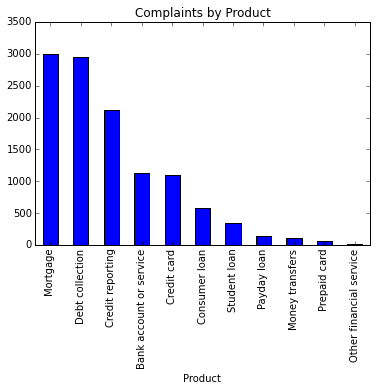

In [7]:
product_complaints.plot(kind='bar',legend=False, title="Complaints by Product")

Out of the over 11,000 consumer complaints received by the Consumer Financial Protection Bureau, over half of them were received in two categories: Mortgage and Debt Collection. Credit Reporting came in at a significant third.

In [8]:
complaints_by_company = complaints_data[["Complaint ID", "Company"]].groupby("Company").count().sort_values(by="Complaint ID", ascending=False).head(10)
complaints_by_company = complaints_by_company.rename(columns={"Complaint ID": "Total_Complaints"})
complaints_by_company

Total_Complaints
Company                              
Bank of America                   766
Equifax                           737
Experian                          675
TransUnion                        604
Wells Fargo                       598
JPMorgan Chase                    545
Ocwen                             408
Citibank                          403
Nationstar Mortgage               357
Capital One                       252

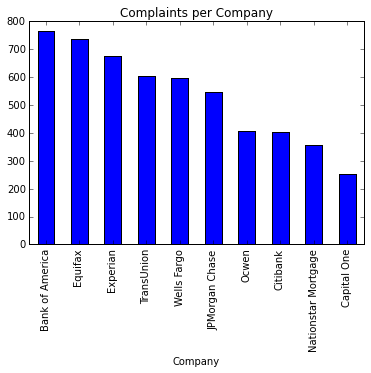

In [9]:
complaints_by_company.plot(kind='bar',legend=False, title="Complaints per Company")

A small number of companies received a large proportion of the toal number of complaints. Bank of America, Equifax, and Experian were the top three, averaging around 700 complaints in December. 

In [10]:
company_response = complaints_data[["Complaint ID", "Company response"]].groupby("Company response").count().sort_values(by="Complaint ID", ascending=False)
company_response

Complaint ID
Company response                             
Closed with explanation                  8185
Closed with non-monetary relief          1253
In progress                              1056
Closed with monetary relief               643
Closed                                    239
Untimely response                         167

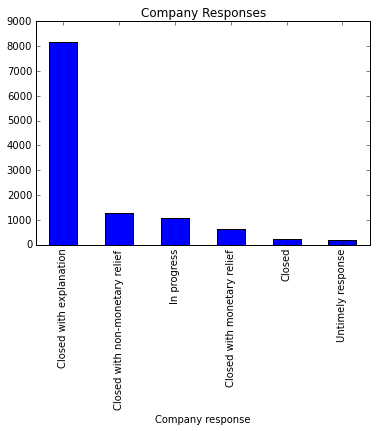

In [11]:
company_response.plot(kind='bar',legend=False, title="Company Responses")
plt.show()

In [12]:
complaints_data.head()

Complaint ID          Product Sub-product  \
0       1177167  Debt collection         NaN   
1       1177166  Debt collection         NaN   
2       1177165  Debt collection         NaN   
3       1177164  Debt collection         NaN   
4       1177163  Debt collection         NaN   

                                   Issue         Sub-issue State  ZIP code  \
0  Cont'd attempts collect debt not owed  Debt is not mine    TX     77068   
1  Cont'd attempts collect debt not owed  Debt is not mine    TX     77068   
2  Cont'd attempts collect debt not owed  Debt is not mine    TX     77068   
3  Cont'd attempts collect debt not owed  Debt is not mine    TX     77068   
4  Cont'd attempts collect debt not owed  Debt is not mine    TX     77068   

  Submitted via Date received Date sent to company  \
0           Web    12/31/2014           12/31/2014   
1           Web    12/31/2014           12/31/2014   
2           Web    12/31/2014           12/31/2014   
3           Web    12/31/2014           12/31/2014   
4           Web    12/31/2014           12/31/2014   

                           Company                 Company response  \
0   Ad Astra Recovery Services Inc          Closed with explanation   
1  Unique Management Services, Inc          Closed with explanation   
2                 CL Holdings, LLC      Closed with monetary relief   
3   Enhanced Recovery Company, LLC  Closed with non-monetary relief   
4       Enhanced Acquisitions, LLC          Closed with explanation   

  Timely response? Consumer disputed?  
0              Yes                NaN  
1              Yes                NaN  
2              Yes                NaN  
3              Yes                NaN  
4              Yes                NaN

In [13]:
date_series = complaints_data[["Date received"]]

In [14]:
complaints_data[["Date received"]] = pd.to_datetime(complaints_data["Date received"], format="%m/%d/%Y")
complaints_data[["Date sent to company"]] = pd.to_datetime(complaints_data["Date sent to company"], format="%m/%d/%Y")
time_data = complaints_data.sort_values(by="Date received", ascending=True)


In [15]:
time_data.insert(9, "Day of Week Received", 0)

In [16]:
time_data.head()

Complaint ID          Product           Sub-product  \
11542       1136158         Mortgage          FHA mortgage   
11218       1137641  Debt collection           Credit card   
11219       1137637  Debt collection           Payday loan   
11220       1137636  Debt collection           Payday loan   
11221       1137635     Prepaid card  General purpose card   

                                          Issue  \
11542  Loan modification,collection,foreclosure   
11218        False statements or representation   
11219      Taking/threatening an illegal action   
11220      Taking/threatening an illegal action   
11221   Unauthorized transactions/trans. issues   

                                  Sub-issue State  ZIP code Submitted via  \
11542                                   NaN    IL     60148           Web   
11218     Attempted to collect wrong amount    MA      1560           Web   
11219  Threatened arrest/jail if do not pay    IN     47933           Web   
11220  Threatened arrest/jail if do not pay    IN     47933           Web   
11221                                   NaN    CA     92253           Web   

      Date received  Day of Week Received Date sent to company  \
11542    2014-12-01                     0           2014-12-01   
11218    2014-12-01                     0           2014-12-18   
11219    2014-12-01                     0           2014-12-01   
11220    2014-12-01                     0           2014-12-05   
11221    2014-12-01                     0           2014-12-05   

                              Company         Company response  \
11542             Nationstar Mortgage  Closed with explanation   
11218  Bryant, Hodge & Associates LLC        Untimely response   
11219       CNG Financial Corporation  Closed with explanation   
11220          Ideal Direct Solutions  Closed with explanation   
11221                            Amex  Closed with explanation   

      Timely response? Consumer disputed?  
11542              Yes                NaN  
11218               No                NaN  
11219              Yes                NaN  
11220              Yes                NaN  
11221              Yes                NaN

In [17]:
time_data['Day of Week Received'] = time_data['Date received'].dt.dayofweek

In [18]:
time_data1 = time_data[["Date received", "Day of Week Received"]]


In [19]:
time_data1 = time_data1.rename(columns={"Day of Week Received": "Day_of_Week_Received"})

In [20]:
time_data_monday = time_data1[time_data1.Day_of_Week_Received == 0]


In [21]:
time_data_monday

Date received  Day_of_Week_Received
11542    2014-12-01                     0
11218    2014-12-01                     0
11219    2014-12-01                     0
11220    2014-12-01                     0
11221    2014-12-01                     0
11222    2014-12-01                     0
11223    2014-12-01                     0
11224    2014-12-01                     0
11225    2014-12-01                     0
11226    2014-12-01                     0
11227    2014-12-01                     0
11228    2014-12-01                     0
11229    2014-12-01                     0
11230    2014-12-01                     0
11231    2014-12-01                     0
11232    2014-12-01                     0
11233    2014-12-01                     0
11234    2014-12-01                     0
11235    2014-12-01                     0
11236    2014-12-01                     0
11237    2014-12-01                     0
11238    2014-12-01                     0
11239    2014-12-01                     0
11240    2014-12-01                     0
11241    2014-12-01                     0
11242    2014-12-01                     0
11217    2014-12-01                     0
11216    2014-12-01                     0
11215    2014-12-01                     0
11214    2014-12-01                     0
...             ...                   ...
1284     2014-12-29                     0
1257     2014-12-29                     0
1258     2014-12-29                     0
1285     2014-12-29                     0
1259     2014-12-29                     0
1260     2014-12-29                     0
1261     2014-12-29                     0
1262     2014-12-29                     0
1263     2014-12-29                     0
1264     2014-12-29                     0
1266     2014-12-29                     0
1267     2014-12-29                     0
1268     2014-12-29                     0
1269     2014-12-29                     0
1270     2014-12-29                     0
1271     2014-12-29                     0
1265     2014-12-29                     0
1273     2014-12-29                     0
1283     2014-12-29                     0
1272     2014-12-29                     0
1282     2014-12-29                     0
1281     2014-12-29                     0
1280     2014-12-29                     0
1279     2014-12-29                     0
1256     2014-12-29                     0
1277     2014-12-29                     0
1276     2014-12-29                     0
1275     2014-12-29                     0
1274     2014-12-29                     0
1278     2014-12-29                     0

[2544 rows x 2 columns]

In [22]:
len(time_data_monday["Date received"].unique())

5

In [23]:
time_data_monday["Date received"].count()

2544

In [24]:
monday_mean_complaints = (time_data_monday["Date received"].count() / len(time_data_monday["Date received"].unique())).round()
monday_mean_complaints

509.0

In [33]:
time_data_tuesday = time_data1[time_data1.Day_of_Week_Received == 1]
tuesday_mean_complaints = (time_data_tuesday["Date received"].count() / len(time_data_tuesday["Date received"].unique())).round()
tuesday_mean_complaints

516.0

In [41]:
time_data_wednesday = time_data1[time_data1.Day_of_Week_Received == 2]
wednesday_mean_complaints = (time_data_wednesday["Date received"].count() / len(time_data_wednesday["Date received"].unique())).round()
wednesday_mean_complaints

458.0

In [42]:
time_data_thursday = time_data1[time_data1.Day_of_Week_Received == 3]
thursday_mean_complaints = (time_data_thursday["Date received"].count() / len(time_data_thursday["Date received"].unique())).round()
thursday_mean_complaints

408.0

In [43]:
time_data_friday = time_data1[time_data1.Day_of_Week_Received == 4]
friday_mean_complaints = (time_data_friday["Date received"].count() / len(time_data_friday["Date received"].unique())).round()
friday_mean_complaints

362.0

In [44]:
time_data_saturday = time_data1[time_data1.Day_of_Week_Received == 5]
saturday_mean_complaints = (time_data_saturday["Date received"].count() / len(time_data_saturday["Date received"].unique())).round()
saturday_mean_complaints

136.0

In [45]:
time_data_sunday = time_data1[time_data1.Day_of_Week_Received == 6]
sunday_mean_complaints = (time_data_sunday["Date received"].count() / len(time_data_sunday["Date received"].unique())).round()
sunday_mean_complaints

127.0

In [51]:
mean_complaints_per_day_of_week = [monday_mean_complaints, tuesday_mean_complaints, wednesday_mean_complaints, thursday_mean_complaints, friday_mean_complaints, saturday_mean_complaints, sunday_mean_complaints]

In [48]:
x1 = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday","Sunday"]
pt(mean_complaints_per_day_of_week, x1)


NameError: name 'plot' is not defined

In [69]:
#class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
mean_complaints = pd.DataFrame(data=mean_complaints_per_day_of_week, index=x1)
mean_complaints = mean_complaints.rename(columns={"": "Total_Dec_Complaints"})
mean_complaints

0
Monday     509
Tuesday    516
Wednesday  458
Thursday   408
Friday     362
Saturday   136
Sunday     127

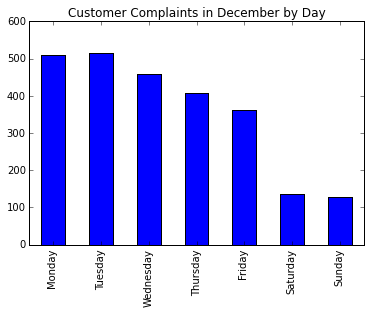

In [73]:
mean_complaints.plot(kind="bar", title="Customer Complaints in December by Day", legend=False)

Who says Mondays are the worst day of the week?! Everybody hates Tuesdays it looks like, which had the most complaints over the month of December. Meanwhile, the complaints go down each day of the week until they plummet on the weekend. We have better things to do!